# ENCS5343 :Computer Vision
<h4>Course Project: <br> Arabic Handwritten Text Identification Using Deep Learning </h4>

<h4> <b>Mohammed Abed Alkareem - 1210708</b> </h4>

# Download Dataset

Dataset Link: https://data.mendeley.com/datasets/2h76672znt/1/files/9031138a-b812-433e-a704-8acb1707936e

<p>The dataset contains 65 different Arabic alphabets (with variations on begin, middle, end and regular alphabets), 10 different Arabic words (that encompass all Arabic alphabets) and 3 different paragraphs. The dataset was collected anonymously from 82 different users. Each user was asked to write each alphabet and word 10 times. A userid uniquely but anonymously identifies the writer of each alphabet, word and paragraph. In total, the dataset consists of 53199 alphabet images, 8144 word images and 241 paragraph images.</p>

- The file **"isolated_words_per_user.zip"** contains 8144 Arabic words organized into one folder per user

In [23]:
# download the dataset from the Mendeley Data
!wget https://data.mendeley.com/public-files/datasets/2h76672znt/files/9031138a-b812-433e-a704-8acb1707936e/file_downloaded -O isolated_words_per_user.zip

--2024-12-26 04:59:20--  https://data.mendeley.com/public-files/datasets/2h76672znt/files/9031138a-b812-433e-a704-8acb1707936e/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/56076a80-b848-4c11-bc65-fa1a0423c35e [following]
--2024-12-26 04:59:21--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/56076a80-b848-4c11-bc65-fa1a0423c35e
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.65.151, 52.218.24.112, 52.92.20.250, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.65.151|:443...

In [24]:
# unzip the dataset
import zipfile

with zipfile.ZipFile('isolated_words_per_user.zip', 'r') as zip_ref:
    zip_ref.extractall('isolated_words_per_user')

# import required libraries

In [1]:
from models import *
from functions import *
from plot import *
from augmentation import augment_images

import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# Data Loading

## Define the transformation

In [2]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)), # Resize the image to 224x224 because there is no standard size for the images in the dataset
        transforms.ToTensor(),
        #make gray scale with 1 channel
        transforms.Grayscale(num_output_channels=1),
     transforms.Normalize((0.5,), (0.5,))])



In [3]:
# Load the dataset
dataset = torchvision.datasets.ImageFolder(root='isolated_words_per_user/isolated_words_per_user', transform=transform)


# Split the data into training , validation and test sets

In [4]:
# Split the dataset into training and testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

#split the training to training and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])


In [5]:
#classes are directory names in the dataset
classes = dataset.classes

In [6]:
classes

['user001',
 'user002',
 'user003',
 'user004',
 'user005',
 'user006',
 'user007',
 'user008',
 'user009',
 'user010',
 'user011',
 'user012',
 'user013',
 'user014',
 'user015',
 'user016',
 'user017',
 'user018',
 'user019',
 'user020',
 'user021',
 'user022',
 'user023',
 'user024',
 'user025',
 'user026',
 'user027',
 'user028',
 'user029',
 'user030',
 'user031',
 'user032',
 'user033',
 'user034',
 'user035',
 'user036',
 'user037',
 'user038',
 'user039',
 'user040',
 'user041',
 'user042',
 'user043',
 'user044',
 'user045',
 'user046',
 'user047',
 'user048',
 'user049',
 'user050',
 'user051',
 'user052',
 'user053',
 'user054',
 'user055',
 'user056',
 'user057',
 'user058',
 'user059',
 'user060',
 'user061',
 'user062',
 'user063',
 'user064',
 'user065',
 'user066',
 'user067',
 'user068',
 'user069',
 'user070',
 'user071',
 'user072',
 'user073',
 'user074',
 'user075',
 'user076',
 'user077',
 'user078',
 'user079',
 'user080',
 'user081',
 'user082']

## Create the data loaders

In [7]:
#define data loaders

batch_size = 256

train_loader = torch.utils.data.DataLoader(
    train_dataset,
      batch_size=batch_size,
        shuffle=True)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
      batch_size=batch_size,
        shuffle=False)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
      batch_size=batch_size,
        shuffle=False)


In [8]:
print(f'Total batches in trainloader: {len(train_loader)}')
print(f'Total batches in valloader: {len(val_loader)}')
print(f'Total batches in testloader: {len(test_loader)}')


Total batches in trainloader: 21
Total batches in valloader: 6
Total batches in testloader: 7


In [9]:
#print shape of one image
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"batch shape: {images.shape}")
print(f"image shape: {images[0].shape}")

batch shape: torch.Size([256, 1, 224, 224])
image shape: torch.Size([1, 224, 224])


## Show Sample Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


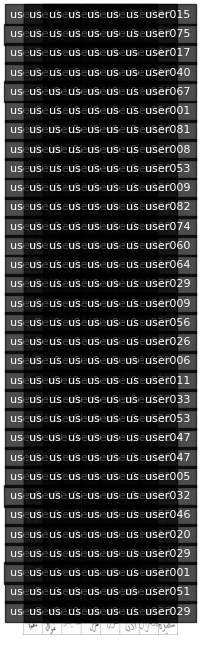

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

# Functions to show an image
def imshow(img, title):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title(title)

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of images
nrow = 8  # Number of images per row
grid_img = torchvision.utils.make_grid(images, nrow=nrow, padding=2)
grid_npimg = grid_img.numpy().transpose((1, 2, 0))  # Prepare the image grid for display

# Calculate image dimensions
img_height = grid_npimg.shape[0] // (len(images) // nrow + (1 if len(images) % nrow > 0 else 0))
img_width = grid_npimg.shape[1] // nrow

# Display the grid with class labels
plt.figure(figsize=(12, 20))
plt.imshow(grid_npimg)
plt.axis('off')

# Add class labels on top of each image
for i in range(len(images)):
    row = i // nrow
    col = i % nrow
    label = classes[labels[i]]
    x = col * img_width + img_width // 2  # Center horizontally in the image
    y = row * img_height + 10            # Place slightly above the image
    plt.text(x, y, label, ha='center', va='bottom', fontsize=8, color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.show()


# Task 1:Build and train a custom CNN network.

## Model 0:

In [35]:
net = NetCNN_0()
net

NetCNN_0(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=62720, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=82, bias=True)
  )
)

In [36]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 4.397, Validation Loss: 4.338
Epoch 1 Training Accuracy: 0.012, Validation Accuracy: 0.025
Epoch 2
Epoch 2 Training Loss: 4.129, Validation Loss: 3.931
Epoch 2 Training Accuracy: 0.040, Validation Accuracy: 0.081
Epoch 3
Epoch 3 Training Loss: 3.525, Validation Loss: 3.393
Epoch 3 Training Accuracy: 0.121, Validation Accuracy: 0.149
Epoch 4
Epoch 4 Training Loss: 2.997, Validation Loss: 3.159
Epoch 4 Training Accuracy: 0.201, Validation Accuracy: 0.204
Epoch 5
Epoch 5 Training Loss: 2.683, Validation Loss: 3.027
Epoch 5 Training Accuracy: 0.277, Validation Accuracy: 0.229
Epoch 6
Epoch 6 Training Loss: 2.438, Validation Loss: 2.987
Epoch 6 Training Accuracy: 0.331, Validation Accuracy: 0.235
Epoch 7
Epoch 7 Training Loss: 2.206, Validation Loss: 3.115
Epoch 7 Training Accuracy: 0.386, Validation Accuracy: 0.234
Epoch 8
Epoch 8 Training Loss: 2.004, Validation Loss: 3.110
Epoch 8 Training Accuracy: 0.419, Validation Accuracy: 0.239
Epoch 9
Epoch 9 Training

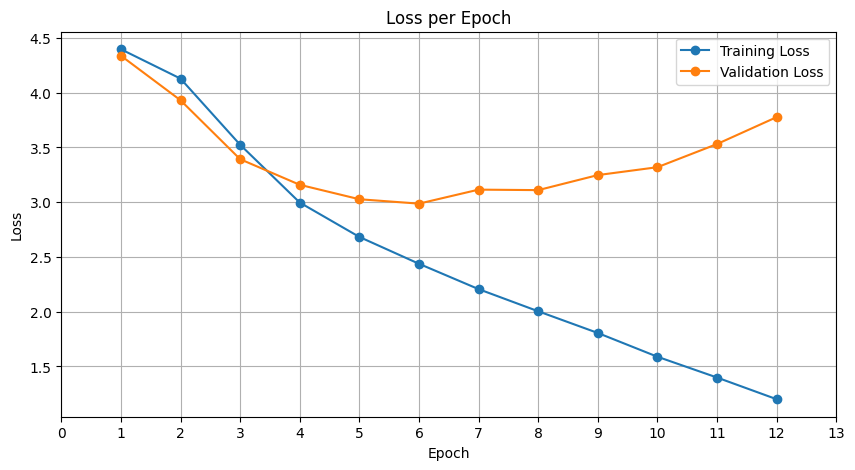

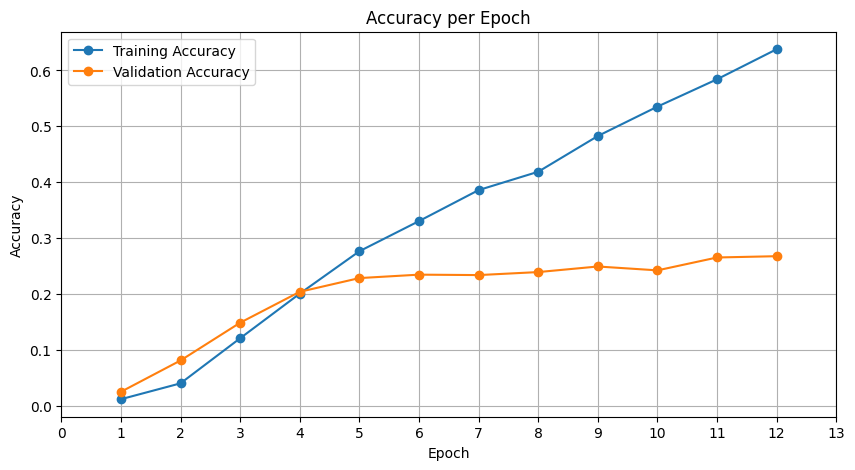

In [37]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [38]:
net = NetCNN_0()
net

NetCNN_0(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=62720, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=82, bias=True)
  )
)

In [39]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.002, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 4.410, Validation Loss: 4.349
Epoch 1 Training Accuracy: 0.013, Validation Accuracy: 0.018
Epoch 2
Epoch 2 Training Loss: 4.132, Validation Loss: 4.023
Epoch 2 Training Accuracy: 0.041, Validation Accuracy: 0.075
Epoch 3
Epoch 3 Training Loss: 3.724, Validation Loss: 3.648
Epoch 3 Training Accuracy: 0.089, Validation Accuracy: 0.108
Epoch 4
Epoch 4 Training Loss: 3.234, Validation Loss: 3.280
Epoch 4 Training Accuracy: 0.171, Validation Accuracy: 0.170
Epoch 5
Epoch 5 Training Loss: 2.860, Validation Loss: 3.176
Epoch 5 Training Accuracy: 0.234, Validation Accuracy: 0.199
Epoch 6
Epoch 6 Training Loss: 2.520, Validation Loss: 3.060
Epoch 6 Training Accuracy: 0.299, Validation Accuracy: 0.241
Epoch 7
Epoch 7 Training Loss: 2.138, Validation Loss: 3.035
Epoch 7 Training Accuracy: 0.392, Validation Accuracy: 0.269
Epoch 8
Epoch 8 Training Loss: 1.820, Validation Loss: 3.122
Epoch 8 Training Accuracy: 0.467, Validation Accuracy: 0.250
Epoch 9
Epoch 9 Training

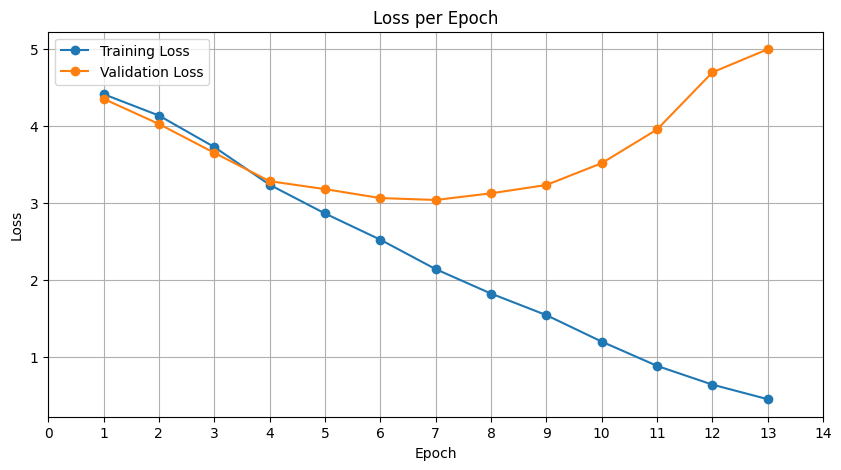

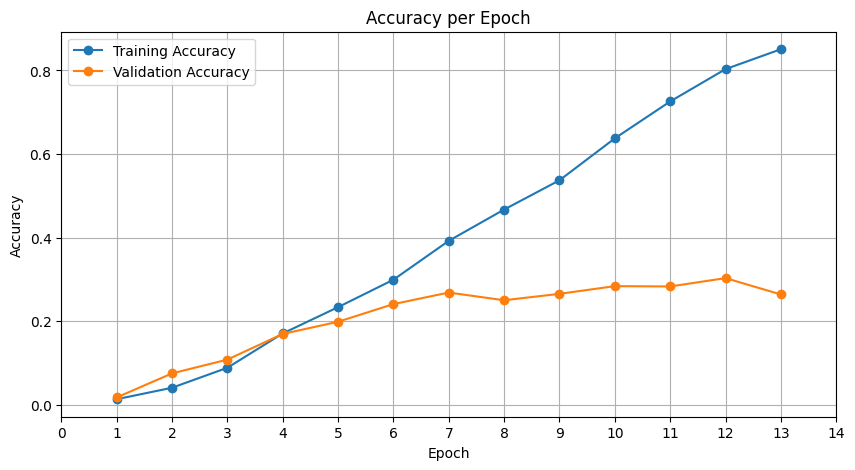

In [40]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 1:
CNN model with 2 convolutional layers and 2 fully connected layers

In [11]:
net = NetCNN_1()
net

NetCNN_1(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=100352, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=82, bias=True)
  )
)

In [12]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 5.378, Validation Loss: 4.402
Epoch 1 Training Accuracy: 0.013, Validation Accuracy: 0.015
Epoch 2
Epoch 2 Training Loss: 4.299, Validation Loss: 4.097
Epoch 2 Training Accuracy: 0.034, Validation Accuracy: 0.074
Epoch 3
Epoch 3 Training Loss: 3.647, Validation Loss: 3.598
Epoch 3 Training Accuracy: 0.153, Validation Accuracy: 0.167
Epoch 4
Epoch 4 Training Loss: 2.519, Validation Loss: 3.556
Epoch 4 Training Accuracy: 0.366, Validation Accuracy: 0.193
Epoch 5
Epoch 5 Training Loss: 1.583, Validation Loss: 3.851
Epoch 5 Training Accuracy: 0.594, Validation Accuracy: 0.218
Epoch 6
Epoch 6 Training Loss: 0.902, Validation Loss: 4.362
Epoch 6 Training Accuracy: 0.771, Validation Accuracy: 0.212
Epoch 7
Epoch 7 Training Loss: 0.453, Validation Loss: 4.852
Epoch 7 Training Accuracy: 0.890, Validation Accuracy: 0.217
Epoch 8
Epoch 8 Training Loss: 0.208, Validation Loss: 5.222
Epoch 8 Training Accuracy: 0.962, Validation Accuracy: 0.239
Epoch 9
Epoch 9 Training

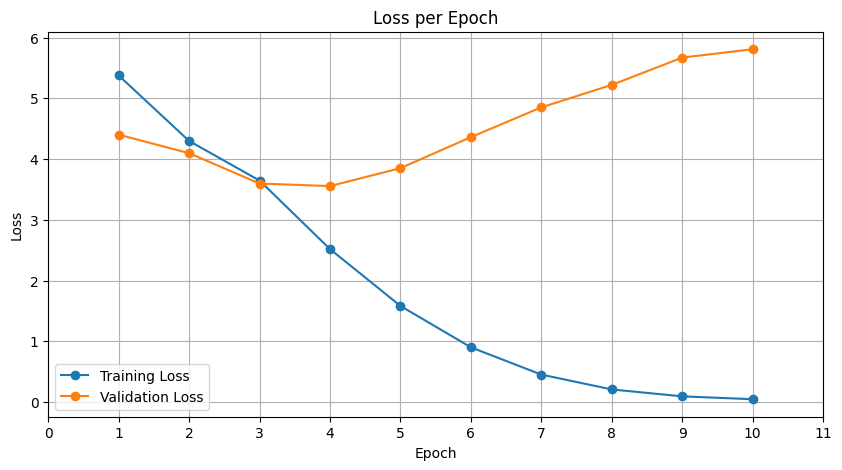

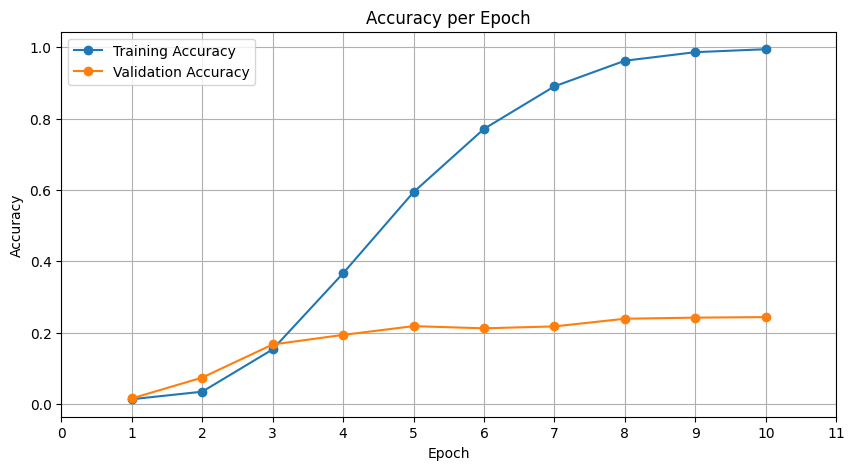

In [13]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [14]:
net = NetCNN_1()
net

NetCNN_1(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=100352, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=82, bias=True)
  )
)

In [15]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.002, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 4.773, Validation Loss: 4.255
Epoch 1 Training Accuracy: 0.023, Validation Accuracy: 0.041
Epoch 2
Epoch 2 Training Loss: 3.799, Validation Loss: 3.583
Epoch 2 Training Accuracy: 0.120, Validation Accuracy: 0.162
Epoch 3
Epoch 3 Training Loss: 2.212, Validation Loss: 3.474
Epoch 3 Training Accuracy: 0.441, Validation Accuracy: 0.194
Epoch 4
Epoch 4 Training Loss: 1.021, Validation Loss: 4.077
Epoch 4 Training Accuracy: 0.737, Validation Accuracy: 0.212
Epoch 5
Epoch 5 Training Loss: 0.336, Validation Loss: 5.085
Epoch 5 Training Accuracy: 0.922, Validation Accuracy: 0.215
Epoch 6
Epoch 6 Training Loss: 0.116, Validation Loss: 5.522
Epoch 6 Training Accuracy: 0.976, Validation Accuracy: 0.228
Epoch 7
Epoch 7 Training Loss: 0.062, Validation Loss: 5.753
Epoch 7 Training Accuracy: 0.988, Validation Accuracy: 0.231
Epoch 8
Epoch 8 Training Loss: 0.077, Validation Loss: 5.362
Epoch 8 Training Accuracy: 0.982, Validation Accuracy: 0.236
Epoch 9
Epoch 9 Training

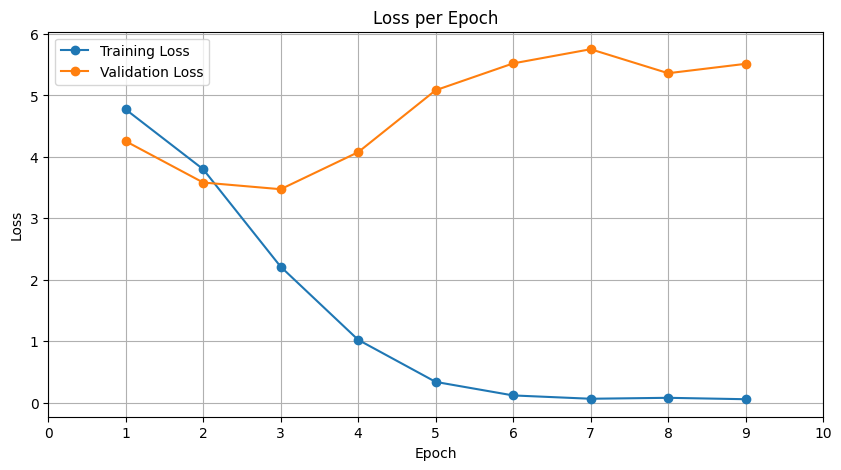

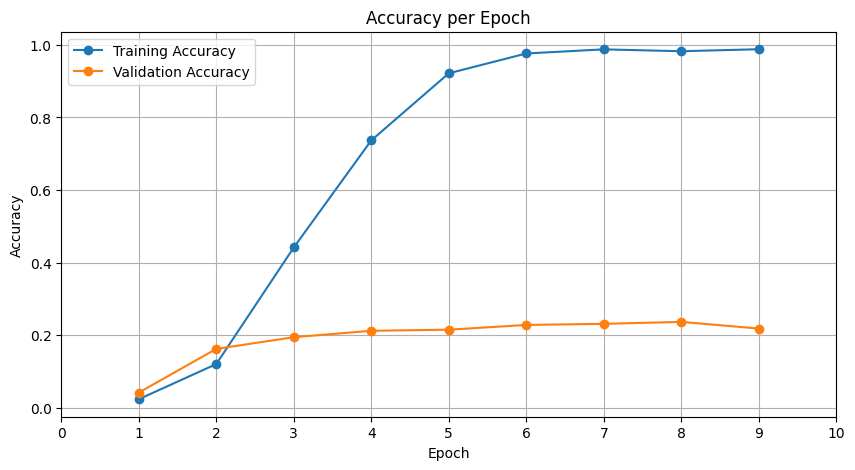

In [16]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 2:

In [17]:
net = NetCNN_2()

net

NetCNN_2(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=43264, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=82, bias=True)
  )
  (dropout): Dropout(p=0.4, inplace=False)
)

In [18]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 5.482, Validation Loss: 4.370
Epoch 1 Training Accuracy: 0.041, Validation Accuracy: 0.035
Epoch 2
Epoch 2 Training Loss: 4.037, Validation Loss: 3.961
Epoch 2 Training Accuracy: 0.103, Validation Accuracy: 0.092
Epoch 3
Epoch 3 Training Loss: 3.308, Validation Loss: 3.809
Epoch 3 Training Accuracy: 0.231, Validation Accuracy: 0.122
Epoch 4
Epoch 4 Training Loss: 2.442, Validation Loss: 3.858
Epoch 4 Training Accuracy: 0.389, Validation Accuracy: 0.151
Epoch 5
Epoch 5 Training Loss: 1.517, Validation Loss: 4.203
Epoch 5 Training Accuracy: 0.600, Validation Accuracy: 0.169
Epoch 6
Epoch 6 Training Loss: 0.784, Validation Loss: 5.093
Epoch 6 Training Accuracy: 0.791, Validation Accuracy: 0.167
Epoch 7
Epoch 7 Training Loss: 0.372, Validation Loss: 5.794
Epoch 7 Training Accuracy: 0.898, Validation Accuracy: 0.170
Epoch 8
Epoch 8 Training Loss: 0.189, Validation Loss: 6.468
Epoch 8 Training Accuracy: 0.952, Validation Accuracy: 0.191
Epoch 9
Epoch 9 Training

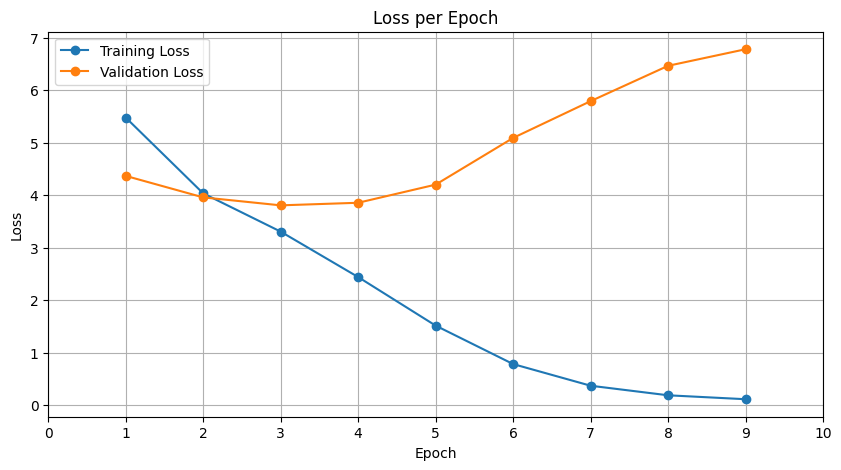

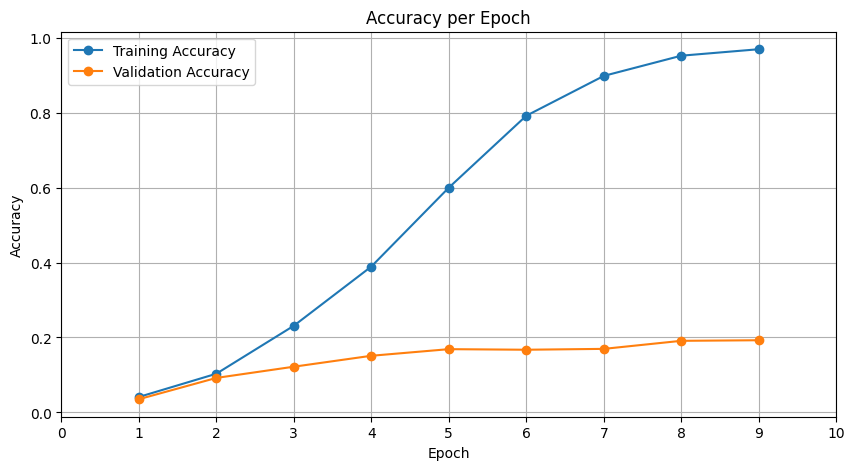

In [19]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [20]:
net = NetCNN_2()

net

NetCNN_2(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=43264, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=82, bias=True)
  )
  (dropout): Dropout(p=0.4, inplace=False)
)

In [21]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.002, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 13.051, Validation Loss: 5.363
Epoch 1 Training Accuracy: 0.025, Validation Accuracy: 0.014
Epoch 2
Epoch 2 Training Loss: 4.440, Validation Loss: 4.344
Epoch 2 Training Accuracy: 0.025, Validation Accuracy: 0.018
Epoch 3
Epoch 3 Training Loss: 4.104, Validation Loss: 3.972
Epoch 3 Training Accuracy: 0.057, Validation Accuracy: 0.075
Epoch 4
Epoch 4 Training Loss: 3.398, Validation Loss: 3.710
Epoch 4 Training Accuracy: 0.177, Validation Accuracy: 0.144
Epoch 5
Epoch 5 Training Loss: 2.323, Validation Loss: 3.749
Epoch 5 Training Accuracy: 0.408, Validation Accuracy: 0.160
Epoch 6
Epoch 6 Training Loss: 1.312, Validation Loss: 4.064
Epoch 6 Training Accuracy: 0.646, Validation Accuracy: 0.177
Epoch 7
Epoch 7 Training Loss: 0.528, Validation Loss: 5.184
Epoch 7 Training Accuracy: 0.851, Validation Accuracy: 0.202
Epoch 8
Epoch 8 Training Loss: 0.187, Validation Loss: 6.266
Epoch 8 Training Accuracy: 0.950, Validation Accuracy: 0.190
Epoch 9
Epoch 9 Trainin

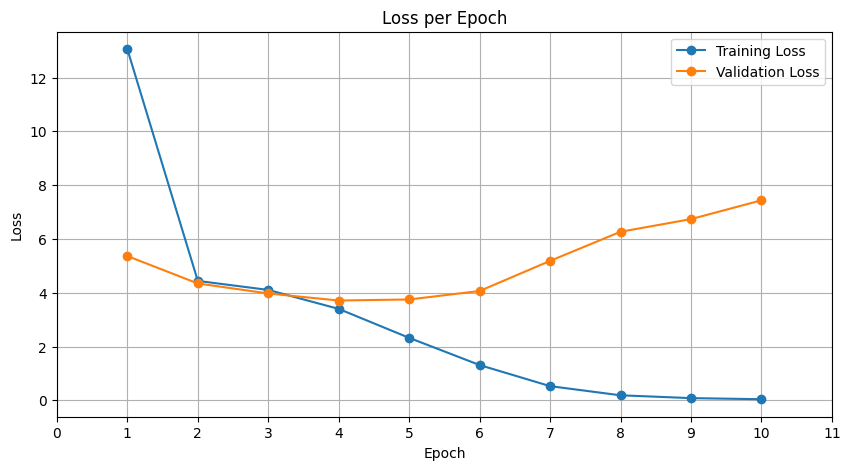

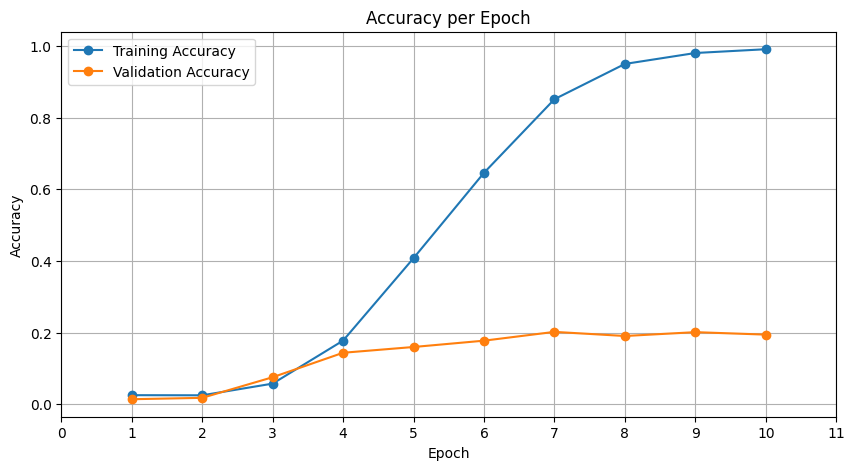

In [23]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 3:

In [24]:

net = NetCNN_3()

net

NetCNN_3(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc_layer): Sequential(
    (0): Dropout(p=0.4, inplace=False)
    (1): Linear(in_features=64, out_features=82, bias=True)
  )
)

In [25]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 4.399, Validation Loss: 4.414
Epoch 1 Training Accuracy: 0.017, Validation Accuracy: 0.010
Epoch 2
Epoch 2 Training Loss: 4.377, Validation Loss: 4.333
Epoch 2 Training Accuracy: 0.014, Validation Accuracy: 0.009
Epoch 3
Epoch 3 Training Loss: 4.287, Validation Loss: 4.215
Epoch 3 Training Accuracy: 0.023, Validation Accuracy: 0.026
Epoch 4
Epoch 4 Training Loss: 4.136, Validation Loss: 4.078
Epoch 4 Training Accuracy: 0.030, Validation Accuracy: 0.035
Epoch 5
Epoch 5 Training Loss: 4.036, Validation Loss: 4.031
Epoch 5 Training Accuracy: 0.032, Validation Accuracy: 0.028
Epoch 6
Epoch 6 Training Loss: 3.962, Validation Loss: 3.982
Epoch 6 Training Accuracy: 0.045, Validation Accuracy: 0.051
Epoch 7
Epoch 7 Training Loss: 3.922, Validation Loss: 3.938
Epoch 7 Training Accuracy: 0.050, Validation Accuracy: 0.048
Epoch 8
Epoch 8 Training Loss: 3.887, Validation Loss: 3.897
Epoch 8 Training Accuracy: 0.057, Validation Accuracy: 0.070
Epoch 9
Epoch 9 Training

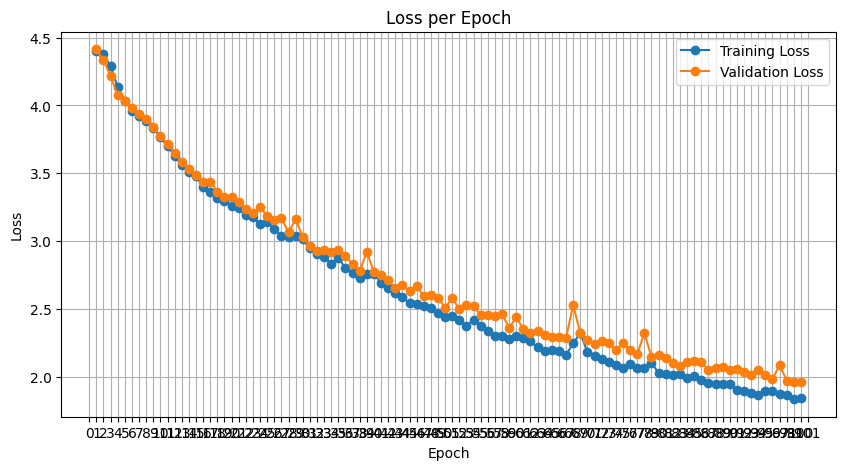

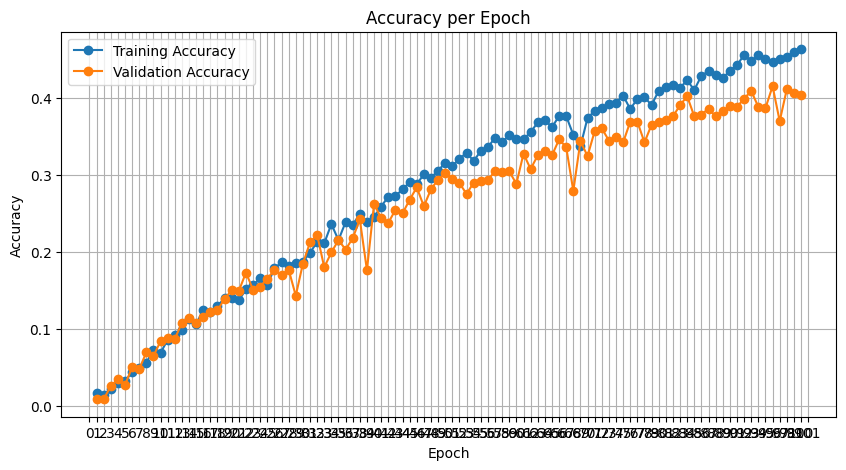

In [26]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [27]:

net = NetCNN_3()

net

NetCNN_3(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc_layer): Sequential(
    (0): Dropout(p=0.4, inplace=False)
    (1): Linear(in_features=64, out_features=82, bias=True)
  )
)

In [28]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.002, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 4.391, Validation Loss: 4.388
Epoch 1 Training Accuracy: 0.014, Validation Accuracy: 0.008
Epoch 2
Epoch 2 Training Loss: 4.306, Validation Loss: 4.241
Epoch 2 Training Accuracy: 0.021, Validation Accuracy: 0.022
Epoch 3
Epoch 3 Training Loss: 4.116, Validation Loss: 4.081
Epoch 3 Training Accuracy: 0.033, Validation Accuracy: 0.026
Epoch 4
Epoch 4 Training Loss: 4.024, Validation Loss: 4.018
Epoch 4 Training Accuracy: 0.035, Validation Accuracy: 0.039
Epoch 5
Epoch 5 Training Loss: 3.958, Validation Loss: 3.977
Epoch 5 Training Accuracy: 0.042, Validation Accuracy: 0.033
Epoch 6
Epoch 6 Training Loss: 3.937, Validation Loss: 3.949
Epoch 6 Training Accuracy: 0.040, Validation Accuracy: 0.051
Epoch 7
Epoch 7 Training Loss: 3.892, Validation Loss: 3.918
Epoch 7 Training Accuracy: 0.039, Validation Accuracy: 0.036
Epoch 8
Epoch 8 Training Loss: 3.860, Validation Loss: 3.869
Epoch 8 Training Accuracy: 0.041, Validation Accuracy: 0.045
Epoch 9
Epoch 9 Training

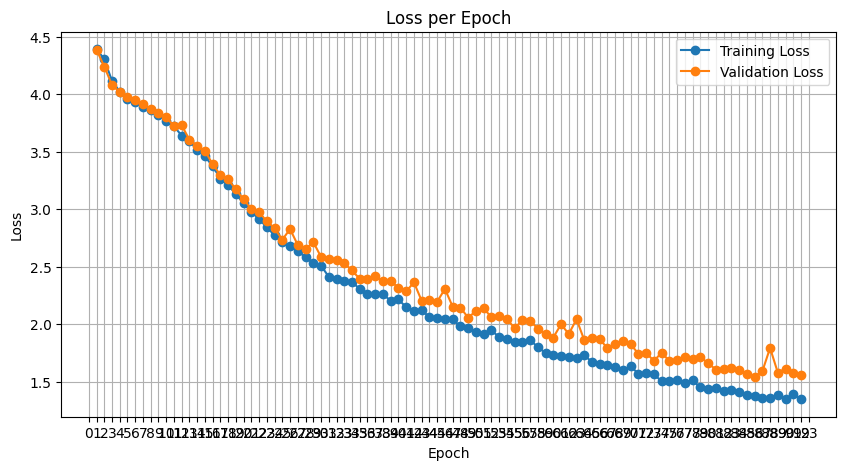

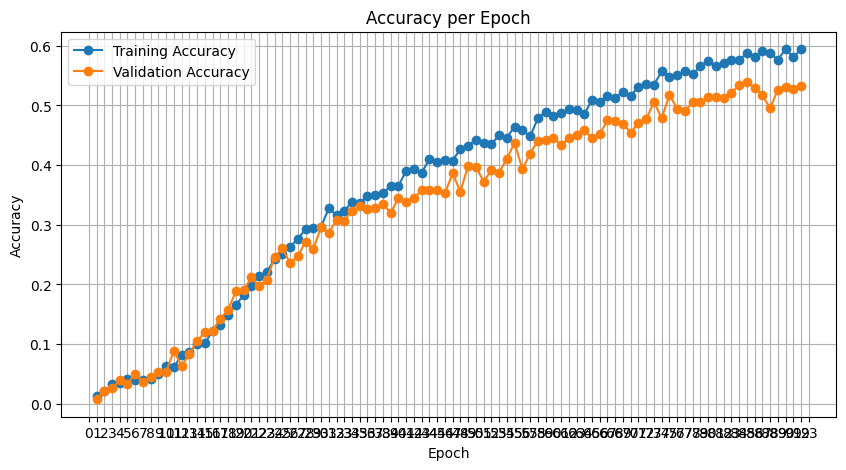

In [30]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 4:

In [29]:
net = NetCNN_4()

net


NetCNN_4(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc_layer): Sequential(
    (0): Linear(in_features=128, out_features=82, bias=True)
  )
)

In [31]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 4.375, Validation Loss: 4.419
Epoch 1 Training Accuracy: 0.017, Validation Accuracy: 0.012
Epoch 2
Epoch 2 Training Loss: 4.331, Validation Loss: 4.237
Epoch 2 Training Accuracy: 0.020, Validation Accuracy: 0.033
Epoch 3
Epoch 3 Training Loss: 4.159, Validation Loss: 4.107
Epoch 3 Training Accuracy: 0.025, Validation Accuracy: 0.032
Epoch 4
Epoch 4 Training Loss: 4.039, Validation Loss: 4.004
Epoch 4 Training Accuracy: 0.035, Validation Accuracy: 0.035
Epoch 5
Epoch 5 Training Loss: 3.960, Validation Loss: 3.988
Epoch 5 Training Accuracy: 0.041, Validation Accuracy: 0.036
Epoch 6
Epoch 6 Training Loss: 3.926, Validation Loss: 3.930
Epoch 6 Training Accuracy: 0.045, Validation Accuracy: 0.048
Epoch 7
Epoch 7 Training Loss: 3.858, Validation Loss: 3.843
Epoch 7 Training Accuracy: 0.061, Validation Accuracy: 0.064
Epoch 8
Epoch 8 Training Loss: 3.791, Validation Loss: 3.820
Epoch 8 Training Accuracy: 0.068, Validation Accuracy: 0.050
Epoch 9
Epoch 9 Training

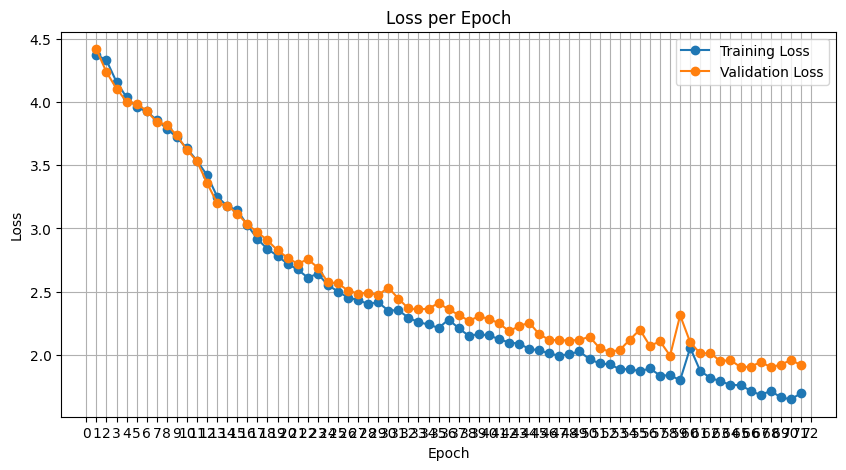

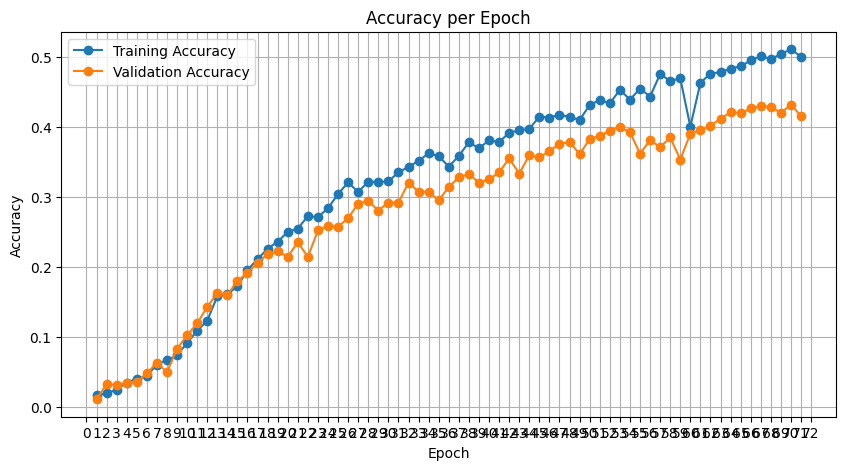

In [32]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [33]:
net = NetCNN_4()

net


NetCNN_4(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc_layer): Sequential(
    (0): Linear(in_features=128, out_features=82, bias=True)
  )
)

In [34]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.002, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 4.332, Validation Loss: 5.927
Epoch 1 Training Accuracy: 0.031, Validation Accuracy: 0.008
Epoch 2
Epoch 2 Training Loss: 4.458, Validation Loss: 4.263
Epoch 2 Training Accuracy: 0.022, Validation Accuracy: 0.029
Epoch 3
Epoch 3 Training Loss: 4.155, Validation Loss: 4.088
Epoch 3 Training Accuracy: 0.028, Validation Accuracy: 0.027
Epoch 4
Epoch 4 Training Loss: 4.015, Validation Loss: 4.032
Epoch 4 Training Accuracy: 0.033, Validation Accuracy: 0.030
Epoch 5
Epoch 5 Training Loss: 3.941, Validation Loss: 3.938
Epoch 5 Training Accuracy: 0.045, Validation Accuracy: 0.062
Epoch 6
Epoch 6 Training Loss: 3.824, Validation Loss: 3.792
Epoch 6 Training Accuracy: 0.054, Validation Accuracy: 0.067
Epoch 7
Epoch 7 Training Loss: 3.737, Validation Loss: 3.745
Epoch 7 Training Accuracy: 0.069, Validation Accuracy: 0.071
Epoch 8
Epoch 8 Training Loss: 3.695, Validation Loss: 3.641
Epoch 8 Training Accuracy: 0.073, Validation Accuracy: 0.101
Epoch 9
Epoch 9 Training

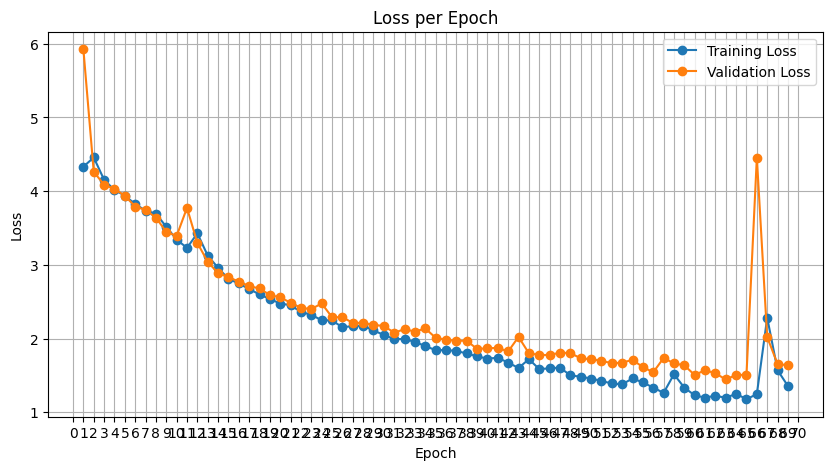

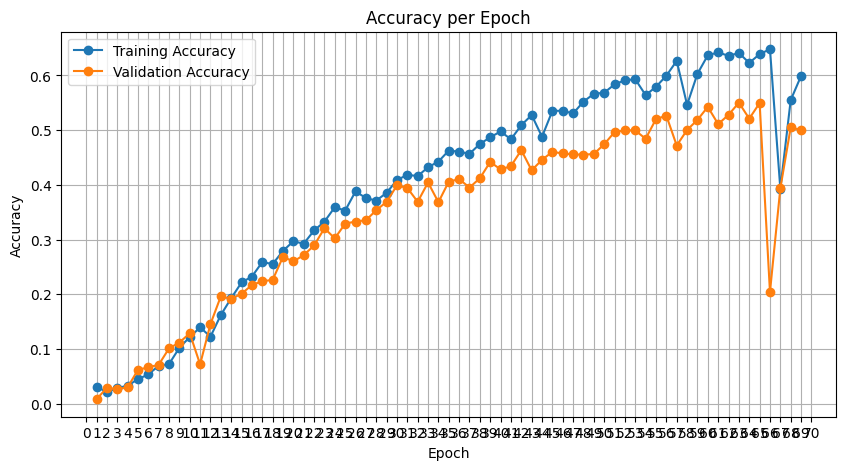

In [35]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 5:

In [36]:

net = NetCNN_5()

net

NetCNN_5(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=3, stride=1, padding=1)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): AvgP

In [37]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 57.362, Validation Loss: 8.526
Epoch 1 Training Accuracy: 0.019, Validation Accuracy: 0.048
Epoch 2
Epoch 2 Training Loss: 4.910, Validation Loss: 4.404
Epoch 2 Training Accuracy: 0.032, Validation Accuracy: 0.022
Epoch 3
Epoch 3 Training Loss: 4.389, Validation Loss: 4.295
Epoch 3 Training Accuracy: 0.020, Validation Accuracy: 0.035
Epoch 4
Epoch 4 Training Loss: 4.012, Validation Loss: 3.655
Epoch 4 Training Accuracy: 0.064, Validation Accuracy: 0.117
Epoch 5
Epoch 5 Training Loss: 3.141, Validation Loss: 3.055
Epoch 5 Training Accuracy: 0.230, Validation Accuracy: 0.231
Epoch 6
Epoch 6 Training Loss: 2.180, Validation Loss: 2.806
Epoch 6 Training Accuracy: 0.420, Validation Accuracy: 0.292
Epoch 7
Epoch 7 Training Loss: 1.324, Validation Loss: 2.937
Epoch 7 Training Accuracy: 0.633, Validation Accuracy: 0.314
Epoch 8
Epoch 8 Training Loss: 0.679, Validation Loss: 3.059
Epoch 8 Training Accuracy: 0.808, Validation Accuracy: 0.346
Epoch 9
Epoch 9 Trainin

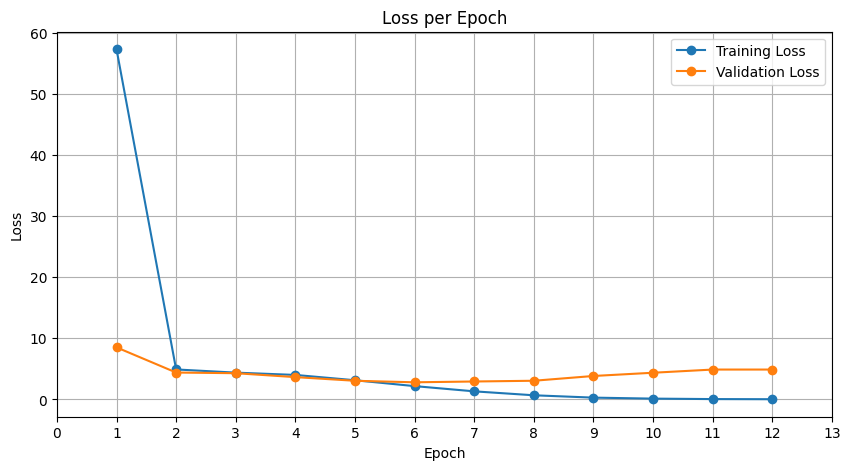

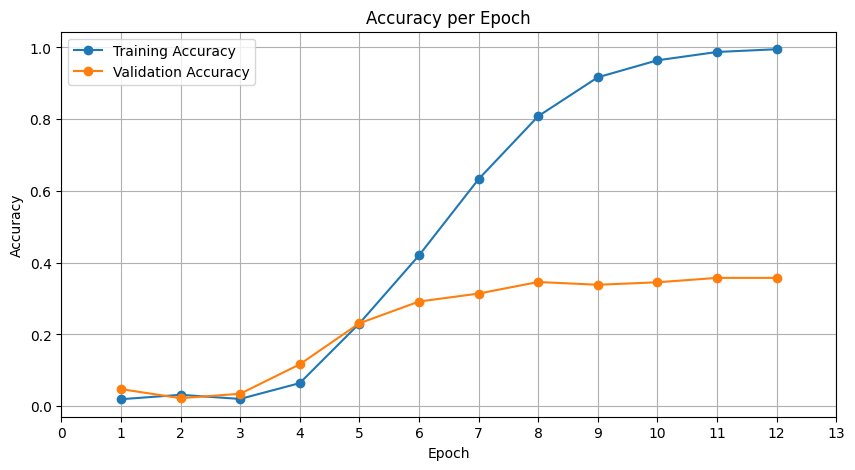

In [38]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [12]:

net = NetCNN_5()

net

NetCNN_5(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=3, stride=1, padding=1)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): AvgP

In [13]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.002, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 153.541, Validation Loss: 50.003
Epoch 1 Training Accuracy: 0.020, Validation Accuracy: 0.015
Epoch 2
Epoch 2 Training Loss: 8.064, Validation Loss: 4.362
Epoch 2 Training Accuracy: 0.025, Validation Accuracy: 0.021
Epoch 3
Epoch 3 Training Loss: 4.106, Validation Loss: 3.566
Epoch 3 Training Accuracy: 0.057, Validation Accuracy: 0.148
Epoch 4
Epoch 4 Training Loss: 3.719, Validation Loss: 3.286
Epoch 4 Training Accuracy: 0.120, Validation Accuracy: 0.159
Epoch 5
Epoch 5 Training Loss: 2.784, Validation Loss: 3.009
Epoch 5 Training Accuracy: 0.273, Validation Accuracy: 0.244
Epoch 6
Epoch 6 Training Loss: 2.036, Validation Loss: 2.885
Epoch 6 Training Accuracy: 0.441, Validation Accuracy: 0.276
Epoch 7
Epoch 7 Training Loss: 1.370, Validation Loss: 3.022
Epoch 7 Training Accuracy: 0.610, Validation Accuracy: 0.307
Epoch 8
Epoch 8 Training Loss: 0.789, Validation Loss: 3.577
Epoch 8 Training Accuracy: 0.769, Validation Accuracy: 0.306
Epoch 9
Epoch 9 Train

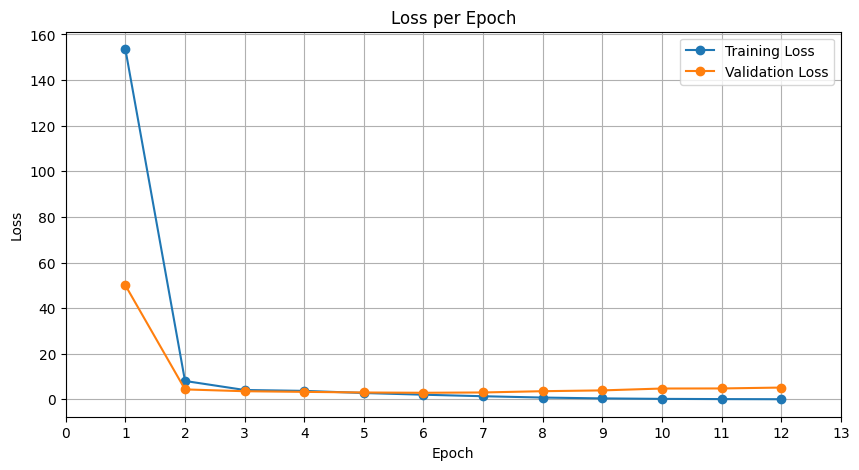

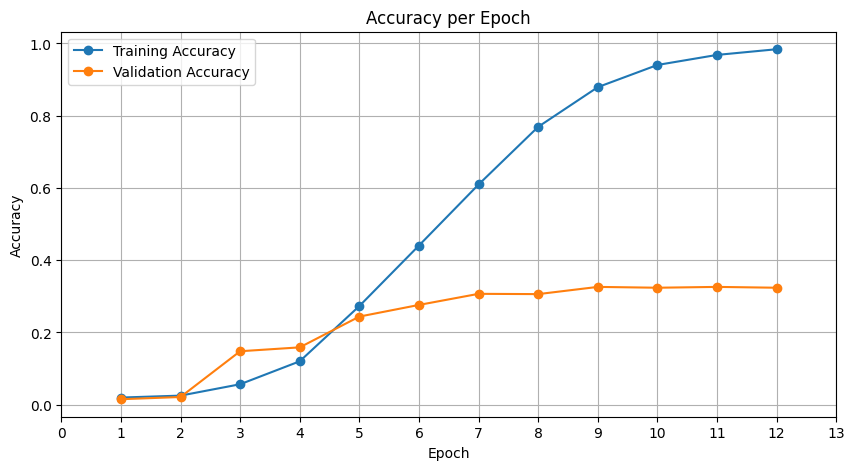

In [14]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 6:

In [15]:

net = NetCNN_6()

net

NetCNN_6(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (16): ReLU()
    (17): AvgPool2d(ke

In [16]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 4.254, Validation Loss: 8.062
Epoch 1 Training Accuracy: 0.049, Validation Accuracy: 0.012
Epoch 2
Epoch 2 Training Loss: 4.057, Validation Loss: 3.631
Epoch 2 Training Accuracy: 0.083, Validation Accuracy: 0.113
Epoch 3
Epoch 3 Training Loss: 3.373, Validation Loss: 3.300
Epoch 3 Training Accuracy: 0.155, Validation Accuracy: 0.166
Epoch 4
Epoch 4 Training Loss: 3.002, Validation Loss: 3.169
Epoch 4 Training Accuracy: 0.219, Validation Accuracy: 0.213
Epoch 5
Epoch 5 Training Loss: 2.624, Validation Loss: 3.003
Epoch 5 Training Accuracy: 0.297, Validation Accuracy: 0.215
Epoch 6
Epoch 6 Training Loss: 2.358, Validation Loss: 2.962
Epoch 6 Training Accuracy: 0.357, Validation Accuracy: 0.267
Epoch 7
Epoch 7 Training Loss: 1.857, Validation Loss: 2.907
Epoch 7 Training Accuracy: 0.474, Validation Accuracy: 0.279
Epoch 8
Epoch 8 Training Loss: 1.498, Validation Loss: 3.037
Epoch 8 Training Accuracy: 0.570, Validation Accuracy: 0.303
Epoch 9
Epoch 9 Training

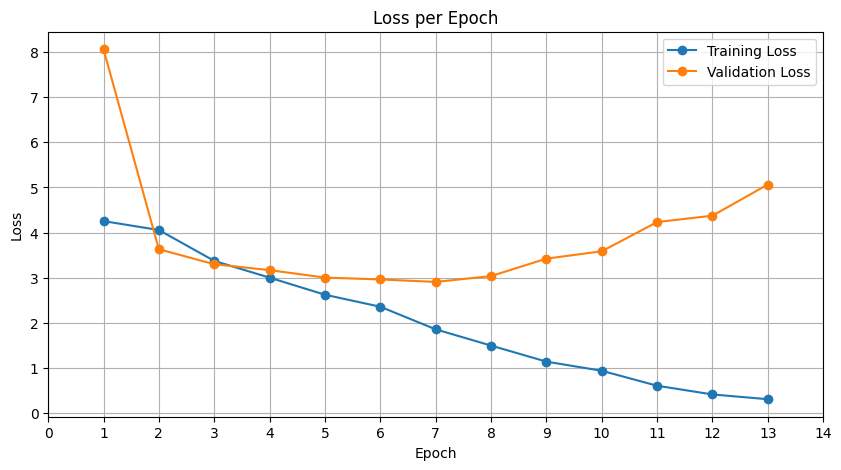

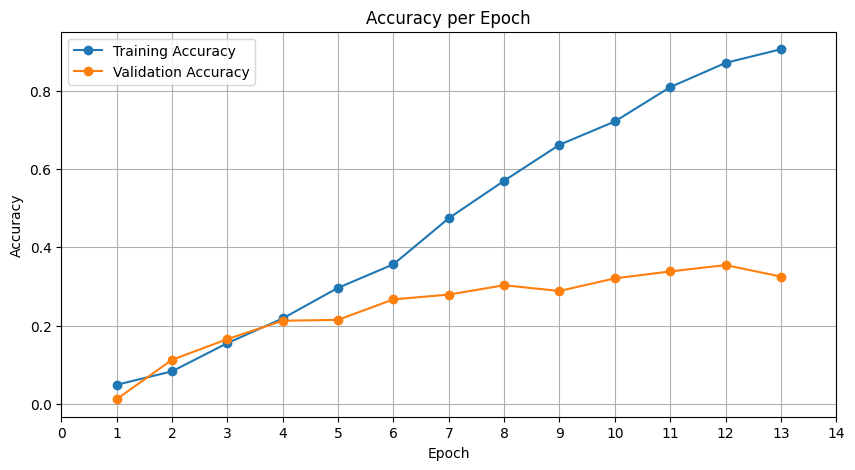

In [17]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [18]:

net = NetCNN_6()

net

NetCNN_6(
  (cnn_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (16): ReLU()
    (17): AvgPool2d(ke

In [19]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.002, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 5.156, Validation Loss: 4.695
Epoch 1 Training Accuracy: 0.017, Validation Accuracy: 0.012
Epoch 2
Epoch 2 Training Loss: 4.129, Validation Loss: 3.857
Epoch 2 Training Accuracy: 0.046, Validation Accuracy: 0.072
Epoch 3
Epoch 3 Training Loss: 3.648, Validation Loss: 3.513
Epoch 3 Training Accuracy: 0.098, Validation Accuracy: 0.108
Epoch 4
Epoch 4 Training Loss: 3.341, Validation Loss: 3.356
Epoch 4 Training Accuracy: 0.154, Validation Accuracy: 0.160
Epoch 5
Epoch 5 Training Loss: 2.928, Validation Loss: 3.088
Epoch 5 Training Accuracy: 0.233, Validation Accuracy: 0.206
Epoch 6
Epoch 6 Training Loss: 2.603, Validation Loss: 2.991
Epoch 6 Training Accuracy: 0.299, Validation Accuracy: 0.223
Epoch 7
Epoch 7 Training Loss: 2.301, Validation Loss: 2.894
Epoch 7 Training Accuracy: 0.361, Validation Accuracy: 0.261
Epoch 8
Epoch 8 Training Loss: 1.976, Validation Loss: 2.926
Epoch 8 Training Accuracy: 0.448, Validation Accuracy: 0.269
Epoch 9
Epoch 9 Training

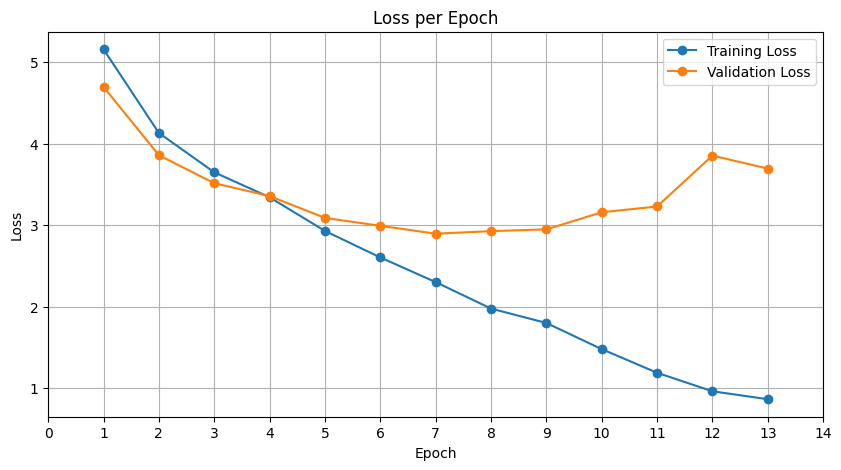

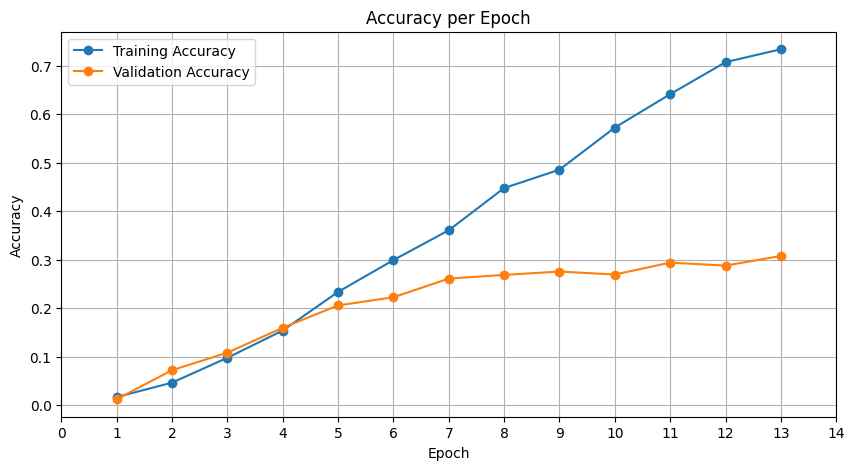

In [20]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

# Task 2:

In [12]:
augment_images('./isolated_words_per_user/isolated_words_per_user',
               './isolated_words_per_user/isolated_words_per_user_augmented')

Processing user082: 100%|██████████| 100/100 [00:02<00:00, 41.06it/s]


In [13]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)), # Resize the image to 224x224 because there is no standard size for the images in the dataset
        transforms.ToTensor(),
        #make gray scale with 1 channel
        transforms.Grayscale(num_output_channels=1),
     transforms.Normalize((0.5,), (0.5,))])


In [14]:
# Load the augmented dataset
augmented_dataset = torchvision.datasets.ImageFolder(root='isolated_words_per_user/isolated_words_per_user_augmented', transform=transform)


In [15]:

train_aug_size = int(0.8 * len(augmented_dataset))
test_aug_size = len(augmented_dataset) - train_aug_size
train_augmented_dataset, test_augmented_dataset = torch.utils.data.random_split(augmented_dataset, [train_aug_size, test_aug_size])

#split the training to training and validation
train_aug_size = int(0.8 * len(train_augmented_dataset))
val_aug_size = len(train_augmented_dataset) - train_aug_size
train_augmented_dataset, val_augmented_dataset = torch.utils.data.random_split(train_augmented_dataset, [train_aug_size, val_aug_size])


In [16]:
train_aug_loader = torch.utils.data.DataLoader(
    train_augmented_dataset,
      batch_size=batch_size,
        shuffle=True)

val_aug_loader = torch.utils.data.DataLoader(
    val_augmented_dataset,
      batch_size=batch_size,
        shuffle=False)

test_aug_loader = torch.utils.data.DataLoader(
    test_augmented_dataset,
      batch_size=batch_size,
        shuffle=False)


In [17]:
print(f'Total batches in trainloader: {len(train_aug_loader)}')
print(f'Total batches in valloader: {len(val_aug_loader)}')
print(f'Total batches in testloader: {len(test_aug_loader)}')


Total batches in trainloader: 102
Total batches in valloader: 26
Total batches in testloader: 32


model 4 is the best model with 55% accuracy

net = NetCNN_4()

net


In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.002, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_aug_loader,
                                      val_loader=val_aug_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

In [ ]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)